<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.500502,63.717616,22.076127,71.936923,-1.348896,218.882272,219.372259,-0.489987
1,0.0,1.0,70.427858,55.690492,35.325084,41.914709,0.587730,213.945873,213.043394,0.902479
2,0.0,2.0,73.458656,22.899774,40.373637,29.712057,-2.737349,173.706775,177.119805,-3.413030
3,0.0,3.0,45.076725,61.155039,79.799378,74.200011,1.862242,272.093396,269.272593,2.820802
4,0.0,4.0,24.393520,41.813749,63.638355,96.613061,-1.245135,235.213550,235.781902,-0.568352
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.376510,54.024279,73.504585,75.819064,1.299406,269.023844,268.067900,0.955944
249996,999.0,246.0,72.687231,37.296268,91.549318,46.352887,-0.255999,257.629705,257.098445,0.531260
249997,999.0,247.0,76.548069,68.956671,49.307235,66.405676,10.595574,281.813226,272.206983,9.606243
249998,999.0,248.0,94.246148,56.488447,32.839337,55.169132,5.415970,254.159034,250.057904,4.101131


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    52.500502  63.717616  22.076127  71.936923  -1.348896   
      1.0    70.427858  55.690492  35.325084  41.914709   0.587730   
      2.0    73.458656  22.899774  40.373637  29.712057  -2.737349   
      3.0    45.076725  61.155039  79.799378  74.200011   1.862242   
      4.0    24.393520  41.813749  63.638355  96.613061  -1.245135   
...                ...        ...        ...        ...        ...   
999.0 245.0  54.376510  54.024279  73.504585  75.819064   1.299406   
      246.0  72.687231  37.296268  91.549318  46.352887  -0.255999   
      247.0  76.548069  68.956671  49.307235  66.405676  10.595574   
      248.0  94.246148  56.488447  32.839337  55.169132   5.415970   
      249.0  33.964959  53.663217  73.017981  22.059349  -5.669272   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    218.882272  219.372259 -0.489987  
      1.0    213.945873  213.043394  0.902479  
      2.0    173.706775  177.119805 -3.413030  
      3.0    272.093396  269.272593  2.820802  
      4.0    235.213550  235.781902 -0.568352  
...                 ...         ...       ...  
999.0 245.0  269.023844  268.067900  0.955944  
      246.0  257.629705  257.098445  0.531260  
      247.0  281.813226  272.206983  9.606243  
      248.0  254.159034  250.057904  4.101131  
      249.0  187.036234  191.177449 -4.141215  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    52.500502  63.717616  22.076127  71.936923  -1.348896   
      1.0    70.427858  55.690492  35.325084  41.914709   0.587730   
      2.0    73.458656  22.899774  40.373637  29.712057  -2.737349   
      3.0    45.076725  61.155039  79.799378  74.200011   1.862242   
      4.0    24.393520  41.813749  63.638355  96.613061  -1.245135   
...                ...        ...        ...        ...        ...   
999.0 245.0  54.376510  54.024279  73.504585  75.819064   1.299406   
      246.0  72.687231  37.296268  91.549318  46.352887  -0.255999   
      247.0  76.548069  68.956671  49.307235  66.405676  10.595574   
      248.0  94.246148  56.488447  32.839337  55.169132   5.415970   
      249.0  33.964959  53.663217  73.017981  22.059349  -5.669272   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    218.882272  219.372259 -0.489987  
      1.0    213.945873  213.043394  0.902479  
      2.0    173.706775  177.119805 -3.413030  
      3.0    272.093396  269.272593  2.820802  
      4.0    235.213550  235.781902 -0.568352  
...                 ...         ...       ...  
999.0 245.0  269.023844  268.067900  0.955944  
      246.0  257.629705  257.098445  0.531260  
      247.0  281.813226  272.206983  9.606243  
      248.0  254.159034  250.057904  4.101131  
      249.0  187.036234  191.177449 -4.141215  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.500502,63.717616,22.076127,71.936923,-1.348896,218.882272,219.372259,-0.489987
1,0.0,1.0,70.427858,55.690492,35.325084,41.914709,0.587730,213.945873,213.043394,0.902479
2,0.0,2.0,73.458656,22.899774,40.373637,29.712057,-2.737349,173.706775,177.119805,-3.413030
3,0.0,3.0,45.076725,61.155039,79.799378,74.200011,1.862242,272.093396,269.272593,2.820802
4,0.0,4.0,24.393520,41.813749,63.638355,96.613061,-1.245135,235.213550,235.781902,-0.568352
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.376510,54.024279,73.504585,75.819064,1.299406,269.023844,268.067900,0.955944
249996,999.0,246.0,72.687231,37.296268,91.549318,46.352887,-0.255999,257.629705,257.098445,0.531260
249997,999.0,247.0,76.548069,68.956671,49.307235,66.405676,10.595574,281.813226,272.206983,9.606243
249998,999.0,248.0,94.246148,56.488447,32.839337,55.169132,5.415970,254.159034,250.057904,4.101131


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    52.500502  63.717616  22.076127  71.936923  -1.348896   
      1.0    70.427858  55.690492  35.325084  41.914709   0.587730   
      2.0    73.458656  22.899774  40.373637  29.712057  -2.737349   
      3.0    45.076725  61.155039  79.799378  74.200011   1.862242   
      4.0    24.393520  41.813749  63.638355  96.613061  -1.245135   
...                ...        ...        ...        ...        ...   
999.0 245.0  54.376510  54.024279  73.504585  75.819064   1.299406   
      246.0  72.687231  37.296268  91.549318  46.352887  -0.255999   
      247.0  76.548069  68.956671  49.307235  66.405676  10.595574   
      248.0  94.246148  56.488447  32.839337  55.169132   5.415970   
      249.0  33.964959  53.663217  73.017981  22.059349  -5.669272   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    218.882272  219.372259 -0.489987  
      1.0    213.945873  213.043394  0.902479  
      2.0    173.706775  177.119805 -3.413030  
      3.0    272.093396  269.272593  2.820802  
      4.0    235.213550  235.781902 -0.568352  
...                 ...         ...       ...  
999.0 245.0  269.023844  268.067900  0.955944  
      246.0  257.629705  257.098445  0.531260  
      247.0  281.813226  272.206983  9.606243  
      248.0  254.159034  250.057904  4.101131  
      249.0  187.036234  191.177449 -4.141215  

[250000 rows x 8 columns]

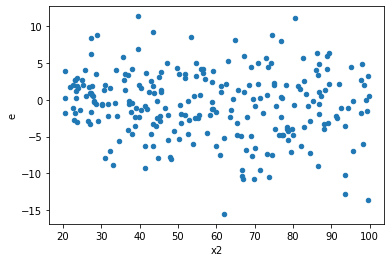

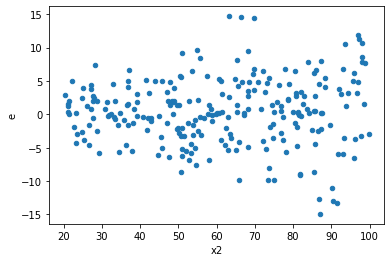

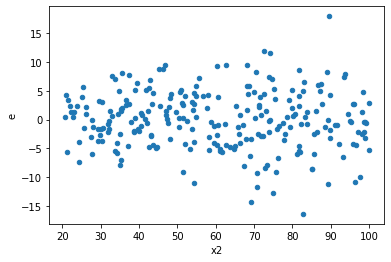

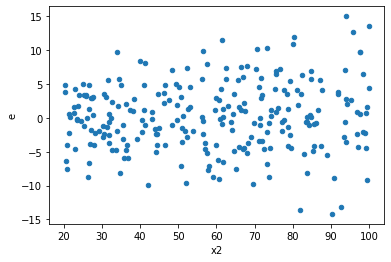

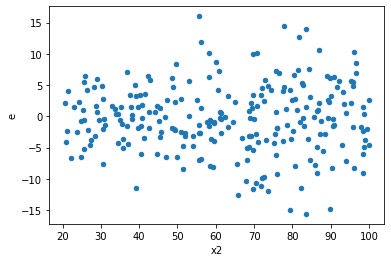

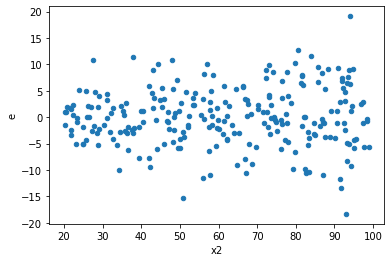

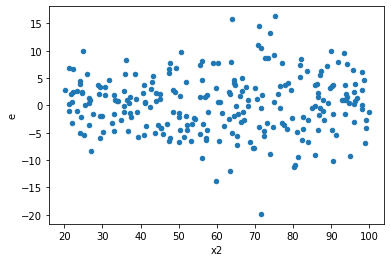

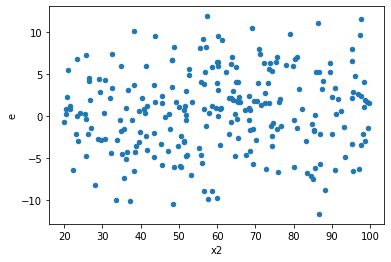

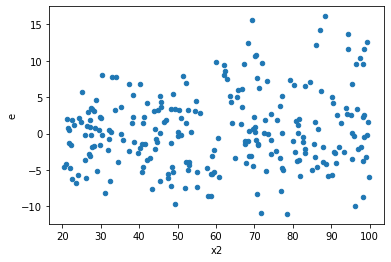

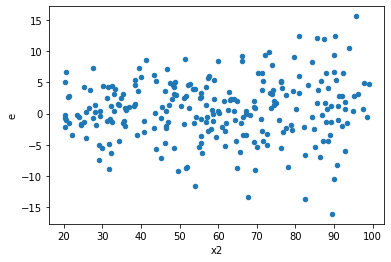

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,116.0,126.0,2726.1782942421673,3079.5393763228044,23.501537019329028,24.44078870097464,1.0399655427163388,0.8278471417077027,0.5860764291461487,0.41392357085385134,Reject001=1 : Homoscedasticity
4.0,126.0,116.0,2888.0501240585077,4205.855535989874,22.921032730623075,36.25737531025753,1.5818386429777558,0.012640780377994654,0.9936796098110027,0.006320390188997327,Reject001=1 : Homoscedasticity
9.0,126.0,116.0,2625.5578668798194,2943.2527829980454,20.837760848252536,25.372868818948668,1.2176389298121946,0.28236060256328166,0.8588196987183592,0.14118030128164083,Reject001=1 : Homoscedasticity
10.0,109.0,133.0,2880.8952642767103,3790.6051782842187,26.43023178235514,28.500790814167058,1.0783405551968797,0.6756249700025436,0.6621875149987282,0.3378124850012718,Reject001=1 : Homoscedasticity
11.0,107.0,135.0,2217.8817900454496,3858.387772894774,20.727867196686447,28.580650169590918,1.378851470746581,0.0774677107385,0.96126614463075,0.03873385536925,Reject001=1 : Homoscedasticity
12.0,110.0,132.0,1550.2726056639094,4623.945225855266,14.093387324217359,35.0298880746611,2.4855549108813273,6.829822216669612e-07,0.9999996585088892,3.414911108334806e-07,Reject001=0 : Heteroscedasticity
14.0,131.0,111.0,2820.5065179736307,3202.536214706105,21.530584106668936,28.85167760996491,1.3400322753449276,0.11256794609482412,0.9437160269525879,0.05628397304741206,Reject001=1 : Homoscedasticity
15.0,128.0,114.0,2221.6996673332615,3674.2341366076485,17.357028651041105,32.23012400533025,1.856891790254493,0.0008321885538087326,0.9995839057230956,0.0004160942769043663,Reject001=0 : Heteroscedasticity
16.0,126.0,116.0,3127.5240365687127,3383.5798957999577,24.821619337846926,29.16879220517205,1.1751365536694354,0.37828699112394504,0.8108565044380275,0.18914349556197252,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,124.0,118.0,2705.4730947514718,2088.1965355710736,21.818331409286063,17.696580809924352,0.811087726094056,0.25001797312652907,Reject001=1 : Homoscedasticity
1.0,132.0,110.0,3416.218991358281,2571.789592511818,25.8804469042294,23.37990538647107,0.9033810533870769,0.574341769735235,Reject001=1 : Homoscedasticity
2.0,119.0,123.0,2985.11569682476,2919.6854691632416,25.085005855670254,23.737280237099526,0.9462736574061399,0.7626578855887353,Reject001=1 : Homoscedasticity
3.0,116.0,126.0,2726.1782942421673,3079.5393763228044,23.501537019329028,24.44078870097464,1.0399655427163388,0.8278471417077027,Reject001=1 : Homoscedasticity
4.0,126.0,116.0,2888.0501240585077,4205.855535989874,22.921032730623075,36.25737531025753,1.5818386429777558,0.012640780377994654,Reject001=1 : Homoscedasticity
5.0,120.0,122.0,3977.148944328705,3313.4373609411273,33.142907869405875,27.159322630664978,0.8194610665328999,0.2752289031056556,Reject001=1 : Homoscedasticity
6.0,124.0,118.0,3918.20305065719,2814.8453143137585,31.598411698848306,23.854621307743717,0.7549310242265489,0.1227563271943815,Reject001=1 : Homoscedasticity
7.0,119.0,123.0,2817.7234653605547,2535.0191852899425,23.678348448408023,20.609912075527987,0.8704117232008072,0.4472179789167124,Reject001=1 : Homoscedasticity
8.0,122.0,120.0,4129.24562027842,2357.616259344481,33.84627557605262,19.646802161204008,0.5804716125133952,0.0029791719251533034,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      803
Reject001=0 : Heteroscedasticity    197
Name: Result_test, dtype: int64